In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import BoxStyle
import matplotlib.patches as patches
import numpy as np
import math
from datetime import date

# Distanziamento

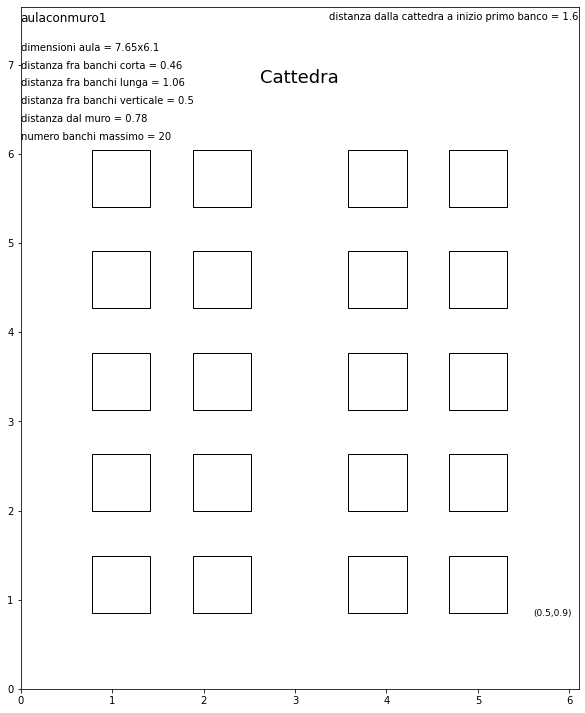

In [2]:
#dimensione aula
larghezza = 6.1
lunghezza = 7.65
#nome aula
aula = 'aulaconmuro1'
#distanza fra banchi
lBancoLunga = 1.06
lBancoCorta = 0.46
lBancoVert = 0.5
#spazio cattedra: distanza muro primo banco
hC = 1.6
#dimensioni banco
#larghezza
ll = 0.64
#profondità
l = 0.64
#
#
#
#################################
# non modificare
#################################
figX = 10
figY = figX*lunghezza/larghezza
figura,spazio = plt.subplots(1,figsize=(figX, figY))
spazio.set_xlim([0, larghezza])
spazio.set_ylim([0, lunghezza])
centroX = larghezza/2
lCattedra = 2
spazio.text(centroX, lunghezza-hC/2, 'Cattedra', fontsize=18,horizontalalignment='center',
            verticalalignment='center')
#legenda
#aula
spazio.text(0, lunghezza-0.05, aula, fontsize=12,horizontalalignment='left',
            verticalalignment='top')
distE = 'distanza dalla cattedra a inizio primo banco = '+str(hC)
spazio.text(larghezza, lunghezza-0.05, distE, fontsize=10,horizontalalignment='right',
            verticalalignment='top')
#dimensioni
lXh = 'dimensioni aula = '+str(lunghezza)+'x'+str(larghezza)
spazio.text(0, lunghezza-0.4, lXh, fontsize=10,horizontalalignment='left',
            verticalalignment='top')
#distanza fra banchi
distB = 'distanza fra banchi corta = '+str(lBancoCorta)
spazio.text(0, lunghezza-0.6, distB, fontsize=10,horizontalalignment='left',
            verticalalignment='top')
distC = 'distanza fra banchi lunga = '+str(lBancoLunga)
spazio.text(0, lunghezza-0.8, distC, fontsize=10,horizontalalignment='left',
            verticalalignment='top')
distD = 'distanza fra banchi verticale = '+str(lBancoVert)
spazio.text(0, lunghezza-1, distD, fontsize=10,horizontalalignment='left',
            verticalalignment='top')
yC = lunghezza-hC
y0 = lunghezza-hC-l
maxfile = int((lunghezza-hC)/(lBancoVert+l))
x = 0
esci = False
while not esci:
    if x<=larghezza-ll:
        x += ll 
        u = 0
    else:
        esci = True    
    if x<=larghezza-lBancoCorta and not esci:
        x += lBancoCorta
        u = lBancoCorta
    else:
        esci = True      
    if x<=larghezza-ll and not esci:
        x += ll 
        u = 0       
    else:
        esci = True       
    if x<=larghezza-lBancoLunga and not esci:
        x += lBancoLunga
        u = lBancoLunga
    else:
        esci = True
dx = u+larghezza-x
if dx>=0:
    x0 = dx/2
else:
    x0 = 0
#distanza dal muro
distM = 'distanza dal muro = '+str(round(x0,2))
spazio.text(0, lunghezza-1.2, distM, fontsize=10,horizontalalignment='left',
            verticalalignment='top')
banco = []
x = x0
y = y0
k = 1
fila = 1
while y>=0 and x<=larghezza-ll:
    banco.append(patches.Rectangle((x,y),ll,l,linewidth=1,edgecolor='k',facecolor='none'))   
    if k == maxfile:    
        y = y0+lBancoVert+l
        if fila%2 == 1:
            x += lBancoCorta+ll
        else:
            x += lBancoLunga+ll
        k = 0
        fila += 1
    y -=lBancoVert+l 
    k +=1
infondox = x-x0
distxM = round(larghezza-infondox,1)
infondoy = round(y0-(maxfile-1)*(l+lBancoVert),1)
infondo = '('+str(distxM)+','+str(infondoy)+')'
spazio.text(infondox, infondoy, infondo, fontsize=9,horizontalalignment='left',
            verticalalignment='top')
#spazio.add_patch(rect)
n = len(banco)
nbMax = 'numero banchi massimo = '+str(n)
spazio.text(0, lunghezza-1.4, nbMax, fontsize=10,horizontalalignment='left',
            verticalalignment='top')
for h in range(0,n):
    spazio.add_patch(banco[h])

oggi = str(date.today())
fileOggi = 'aule/nuove/'+aula+'_'+oggi+'.pdf'
plt.savefig(fileOggi)
plt.show()